In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from pmdarima import auto_arima

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Run the stored data from the Data_Preparation.ipynb
%run ..//Data_Preparation.ipynb

Data types in 'indu' dataframe:
Time       datetime64[ns]
indu_Q1           float64
indu_Q2           float64
indu_Q3           float64
indu_Q4           float64
indu_Q5           float64
indu_Q7           float64
dtype: object

Data types in 'cons' dataframe:
Time        datetime64[ns]
cons_Q1            float64
cons_Q2            float64
cons_Q3            float64
cons_Q4            float64
cons_Q5            float64
cons_Q6            float64
cons_Q7            float64
cons_Q8            float64
cons_Q9            float64
cons_Q10           float64
cons_Q11           float64
cons_Q12           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object
indu_Q1           float64
indu_Q2           float64
indu_Q3           float64
indu_Q4           float64
indu_Q5           float64
indu_Q7           float64
Time       datetime64[ns]
dtype: object
cons_Q1            float64
cons_Q2            float64
cons_Q3            float64
con

In [3]:
#Using the period 1990-2015 for training and 2016-2020 for testing
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2016-01-01')]

gdp_test = gdp[(gdp['Time'] >= '2016-01-01') & (gdp['Time'] < '2020-01-01')]

In [4]:
print(gdp_train)


          Time  Value
0   1990-01-01  210.2
1   1990-04-01  218.1
2   1990-07-01  209.5
3   1990-10-01  217.8
4   1991-01-01  220.2
..         ...    ...
99  2014-10-01  512.7
100 2015-01-01  495.9
101 2015-04-01  513.5
102 2015-07-01  505.9
103 2015-10-01  521.1

[104 rows x 2 columns]
      cons_Q1    cons_Q2    cons_Q3    cons_Q4    cons_Q5    cons_Q6  \
0   -3.166667   3.333333  -9.333333  -4.500000  -5.333333  -5.666667   
1   -0.666667   3.333333 -13.833333  -6.833333  -8.833333  -6.666667   
2   -0.500000   3.833333 -21.666667 -14.666667 -11.500000  -7.500000   
3   -2.666667   1.833333 -16.833333 -11.000000 -14.833333  -8.666667   
4   -1.666667   6.500000   2.000000  -1.000000 -23.666667 -15.833333   
..        ...        ...        ...        ...        ...        ...   
99   4.400000  13.666667  11.500000  14.666667  -5.433333  19.133333   
100  6.033333  14.300000  15.333333  19.933333 -17.733333  10.700000   
101  5.133333  15.133333  20.133333  23.266667  -8.433333  20.06

In [5]:
#Resetting the index
gdp_train.reset_index(drop=True, inplace=True)


#Fit auto_arima function to the data
arimax_model = auto_arima(gdp_train['Value'],
                          start_p=1, start_q=1,
                          max_p=3, max_q=3, 
                          m=4, seasonal=True,
                          trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the model
arimax_model.summary()

Performing stepwise search to minimize aic


 ARIMA(1,0,1)(1,1,1)[4] intercept   : AIC=630.755, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=736.197, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=633.803, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=666.181, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=828.733, Time=0.01 sec
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=629.676, Time=0.14 sec
 ARIMA(1,0,1)(0,1,0)[4] intercept   : AIC=656.893, Time=0.07 sec
 ARIMA(1,0,1)(0,1,2)[4] intercept   : AIC=630.734, Time=0.21 sec
 ARIMA(1,0,1)(1,1,0)[4] intercept   : AIC=634.879, Time=0.13 sec
 ARIMA(1,0,1)(1,1,2)[4] intercept   : AIC=631.461, Time=0.54 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=628.732, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=661.275, Time=0.04 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=629.443, Time=0.13 sec
 ARIMA(1,0,0)(0,1,2)[4] intercept   : AIC=629.492, Time=0.14 sec
 ARIMA(1,0,0)(1,1,2)[4] intercept   : AIC=631.397, Time=0.21 sec
 ARIMA(0,0,0)(0,1,1)[4] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  104
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 4)   Log Likelihood                -310.366
Date:                             Tue, 30 Apr 2024   AIC                            628.732
Time:                                     19:12:26   BIC                            639.152
Sample:                                          0   HQIC                           632.949
                                             - 104                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0948      0.670      3.128      0.002       0.782       3.408
ar.L1          0.8222      0.052     15.782      0.000       0.720       0.924
ma.S.L4       -0.5982      0.079     -7.561      0.000      -0.753      -0.443
sigma2        28.4124      3.331      8.528      0.000      21.883      34.942
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):                17.98
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -0.56
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

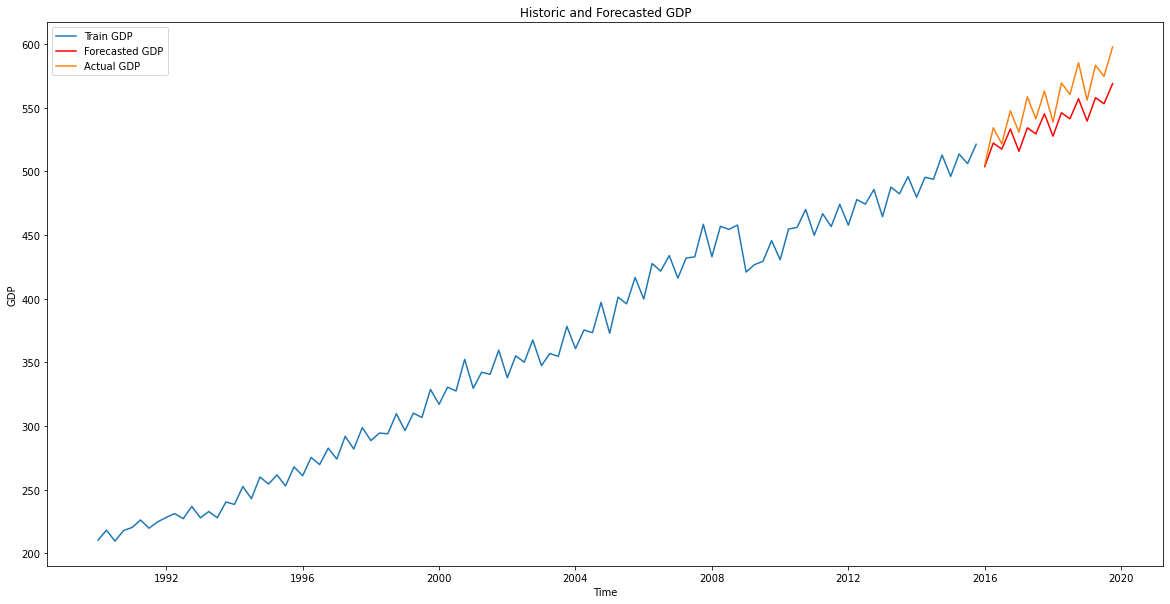

In [6]:
# Forecast the GDP values
forecast = arimax_model.predict(n_periods=16)

# Get the forecasted values
forecast_values = forecast.tolist()

# Plotting historic GDP and forecasted GDP
plt.figure(figsize=(20,10))
plt.plot(gdp_train['Time'].to_numpy(), gdp_train['Value'].to_numpy(), label='Train GDP')
plt.plot(gdp_test['Time'].to_numpy(), forecast_values, color='red', label='Forecasted GDP')
plt.plot(gdp_test['Time'].to_numpy(), gdp_test['Value'].to_numpy(), label='Actual GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [7]:
#Comparing the forecasted values with the actual values trough RMSE and MAPE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)
# Calculate the MAPE
mape_value = mean_absolute_percentage_error(gdp_test['Value'], forecast_values)*100 #Multiplying by 100 to get the percentage

# Print the RMSE
print("The RMSE is", rmse_value)
# Print the MAPE
print("The MAPE is", mape_value)

#The RMSE is 19. This is a good result, as the GDP is a very volatile variable.
#The MAPE is 3%. This is pretty good.

The RMSE is 18.851486485461884
The MAPE is 3.044747611784285


In [8]:
import os
import json

#Define the evaluation metric name for this model
metric_name = "Multi_UniVar_Pre_SARIMAX"

# Create a dictionary with the MAPE value

# Get the current directory
current_dir = os.getcwd()

# Navigate to the directory where mape_values.json is located
json_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..', 'mape_values.json'))

# Check if the file exists and is not empty
if os.path.exists(json_dir) and os.path.getsize(json_dir) > 0:
    # Load the .json file that stores the MAPE results
    with open(json_dir, 'r') as file:
        data = json.load(file)
else:
    data = {}

# Add the MAPE value to the dictionary with a corresponding key
data[metric_name] = mape_value

# Write the MAPE value to the .json file
with open(json_dir, 'w') as file:
    json.dump(data, file, indent=4)

# Create a dictionary with the RMSE value

# Navigate to the directory where rsme_values.json is located
json_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..', 'rsme_values.json'))

# Check if the file exists and is not empty
if os.path.exists(json_dir) and os.path.getsize(json_dir) > 0:
    # Load the .json file that stores the RMSE results
    with open(json_dir, 'r') as file:
        data = json.load(file)
else:
    data = {}

# Add the RMSE value to the dictionary with a corresponding key
data[metric_name] = rmse_value

# Write the RMSE value to the .json file
with open(json_dir, 'w') as file:
    json.dump(data, file, indent=4)